In [12]:
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np

In [4]:
# characters = set(['Frodo', 'Sam', 'Gandalf', 'Legolas', 'Gimli', 'Aragorn', 'Boromir',
#                  'Pippin', 'Merry', 'Saruman', 'Bilbo'])

characters = set(['frodo', 'sam', 'gandalf', 'aragorn', 'legolas', 'gimli',
                 'boromir', 'pippin', 'merry', 'saruman', 'bilbo'])

# Storage of Character Relationships.
chars = {}
for character in characters:
    chars[character] = {}
    for other_char in characters:
        if (other_char != character):
            chars[character][other_char] = 0

In [5]:
import string 
f = open("FotR.txt","r")
for line in f:
    # Lowercase all words and remove all punctuation.
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table).lower() for w in line.split()] 
    # Set of each paragraph of words.
    para = set(stripped)  
    for char1 in para:
        if char1 in characters:
            #print(True)
            for char2 in para:
                if ((char2 in characters) and char1 != char2):
                    chars[char1][char2] += 1

In [6]:
import string
# Converts chars (dict) to list utilized in getData() within FotRVisualizations.html
listoflists = []
#chars['Aragorn']
for char in chars:
    dic = chars[char]
    for c in dic:
        l = []
        l.append(str(char[0].upper() + char[1:]))
        l.append(str(c[0].upper() + c[1:]))
        l.append(dic[c])
        listoflists.append(l)
listoflists

[['Saruman', 'Sam', 0],
 ['Saruman', 'Pippin', 0],
 ['Saruman', 'Gandalf', 20],
 ['Saruman', 'Bilbo', 0],
 ['Saruman', 'Aragorn', 0],
 ['Saruman', 'Merry', 0],
 ['Saruman', 'Legolas', 0],
 ['Saruman', 'Gimli', 0],
 ['Saruman', 'Frodo', 0],
 ['Saruman', 'Boromir', 0],
 ['Sam', 'Saruman', 0],
 ['Sam', 'Pippin', 14],
 ['Sam', 'Gandalf', 8],
 ['Sam', 'Bilbo', 1],
 ['Sam', 'Aragorn', 4],
 ['Sam', 'Merry', 18],
 ['Sam', 'Legolas', 4],
 ['Sam', 'Gimli', 2],
 ['Sam', 'Frodo', 63],
 ['Sam', 'Boromir', 2],
 ['Pippin', 'Saruman', 0],
 ['Pippin', 'Sam', 14],
 ['Pippin', 'Gandalf', 3],
 ['Pippin', 'Bilbo', 0],
 ['Pippin', 'Aragorn', 2],
 ['Pippin', 'Merry', 45],
 ['Pippin', 'Legolas', 3],
 ['Pippin', 'Gimli', 4],
 ['Pippin', 'Frodo', 16],
 ['Pippin', 'Boromir', 6],
 ['Gandalf', 'Saruman', 20],
 ['Gandalf', 'Sam', 8],
 ['Gandalf', 'Pippin', 3],
 ['Gandalf', 'Bilbo', 25],
 ['Gandalf', 'Aragorn', 6],
 ['Gandalf', 'Merry', 2],
 ['Gandalf', 'Legolas', 6],
 ['Gandalf', 'Gimli', 6],
 ['Gandalf', 'Frodo', 

In [7]:
import pandas as pd
vader = open("vader_lexicon.txt").readlines()
vader = [v.split("\t") for v in vader]

sent = pd.DataFrame(columns = {'token', 'polarity'}) 
for v in vader:
    sent = sent.append({'token': v[0], 'polarity': float(v[1])}, ignore_index=True)
# #df = df.append({'A': i}, ignore_index=True)
sent = sent.set_index('token')

In [27]:
# Sorts book by quotes from the character. 
characters = set(['frodo:', 'sam:', 'gandalf:', 'aragorn:', 'legolas:', 'gimli:',
                 'boromir:', 'pippin:', 'merry:', 'saruman:', 'bilbo:'])
characters1 = set(['frodo', 'sam', 'gandalf', 'aragorn', 'legolas', 'gimli',
                 'boromir', 'pippin', 'merry', 'saruman', 'bilbo'])

char_quotes = {}
for character in characters1:
    char_quotes[character] = []
char_quotes

data = [] 
f = open("FotR.txt","r")
count = 0 # counter for # of lines -> used for line location = 2416
for line in f:
    count += 1 
    # Lowercase all words and remove all punctuation.
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table).lower() for w in line.split()]
    split = line.split()
    for word in split:
        word = word.lower()
        if (word in characters):
            s = ""
            for w in stripped:
                if ((w != "") and (w+":" not in characters)):
                    s =  s + " " + w
            #print(word[:-1])
            if s != "":
                l = []
                l.append(count / 2416)
                l.append(s.strip())
                char_quotes[word[:-1]].append(l)

In [29]:
# Frodo 
frodo = {'line_num': [item[0] for item in char_quotes['frodo']], 
     'no_punc': [item[1] for item in char_quotes['frodo']]}
frodo = pd.DataFrame(data=frodo)
frodo = frodo.set_index('line_num')
frodo_tidy = frodo['no_punc'].str.split(expand=True).stack()
frodo_tidy = frodo_tidy.reset_index()
frodo_tidy = frodo_tidy.set_index('line_num')
frodo_tidy = frodo_tidy.rename(columns={'level_1':'num', 0:'word'})
tidy = frodo_tidy.merge(sent, how='left', left_on='word', right_index=True)
frodo['polarity'] = tidy.groupby(tidy.index).sum()['polarity']

In [39]:
# Gandalf 
gandalf = {'line_num': [item[0] for item in char_quotes['gandalf']], 
     'no_punc': [item[1] for item in char_quotes['gandalf']]}
gandalf = pd.DataFrame(data=gandalf)
gandalf = gandalf.set_index('line_num')
gandalf_tidy = gandalf['no_punc'].str.split(expand=True).stack()
gandalf_tidy = gandalf_tidy.reset_index()
gandalf_tidy = gandalf_tidy.set_index('line_num')
gandalf_tidy = gandalf_tidy.rename(columns={'level_1':'num', 0:'word'})
tidy = gandalf_tidy.merge(sent, how='left', left_on='word', right_index=True)
gandalf['polarity'] = tidy.groupby(tidy.index).sum()['polarity']

In [135]:
# Sam
sam = {'line_num': [item[0] for item in char_quotes['sam']], 
     'no_punc': [item[1] for item in char_quotes['sam']]}
sam = pd.DataFrame(data=sam)
sam = sam.set_index('line_num')
sam_tidy = sam['no_punc'].str.split(expand=True).stack()
sam_tidy = sam_tidy.reset_index()
sam_tidy = sam_tidy.set_index('line_num')
sam_tidy = sam_tidy.rename(columns={'level_1':'num', 0:'word'})
tidy = sam_tidy.merge(sent, how='left', left_on='word', right_index=True)
sam['polarity'] = tidy.groupby(tidy.index).sum()['polarity']

In [136]:
# Aragorn 
aragorn = {'line_num': [item[0] for item in char_quotes['aragorn']], 
     'no_punc': [item[1] for item in char_quotes['aragorn']]}
aragorn = pd.DataFrame(data=aragorn)
aragorn = aragorn.set_index('line_num')
aragorn_tidy = aragorn['no_punc'].str.split(expand=True).stack()
aragorn_tidy = aragorn_tidy.reset_index()
aragorn_tidy = aragorn_tidy.set_index('line_num')
aragorn_tidy = aragorn_tidy.rename(columns={'level_1':'num', 0:'word'})
tidy = aragorn_tidy.merge(sent, how='left', left_on='word', right_index=True)
aragorn['polarity'] = tidy.groupby(tidy.index).sum()['polarity']

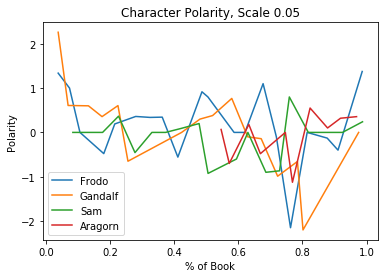

In [167]:
# Cumulative Graph
x_fro = frodo.index
y_fro = frodo.polarity.tolist()
fro1 = xy_vals(x_fro, y_fro)

x_gan = gandalf.index
y_gan = gandalf.polarity.tolist()
gan1 = xy_vals(x_gan, y_gan)

x_sam = sam.index
y_sam = sam.polarity.tolist()
sam1 = xy_vals(x_sam, y_sam)

x_ara = aragorn.index
y_ara = aragorn.polarity.tolist()
ara1 = xy_vals(x_ara, y_ara)


plt.plot(fro1[0], fro1[1], label='Frodo');
plt.plot(gan1[0], gan1[1], label='Gandalf');
plt.plot(sam1[0], sam1[1], label = 'Sam');
plt.plot(ara1[0], ara1[1], label = 'Aragorn');

plt.title('Character Polarity, Scale 0.05')
plt.xlabel('% of Book')
plt.ylabel('Polarity')
plt.legend();

In [165]:
# Returns averaged out values for smoothing purposes. 
def xy_vals(x, y):
    x_ret = []
    y_ret = []
    y = np.asarray(y)
    
    for i in range(20):
        vals = list(np.where(np.logical_and(x>=i*0.05, x<=(i+1)*0.05)))
        #print(vals[0])
        if vals[0].size > 0:
            mean = np.mean(x[vals])
            mean2 = np.mean(y[vals])

            x_ret.append(mean)
            y_ret.append(mean2)
    return x_ret, y_ret

xy_vals(x_ara, y_ara)

([0.5464955849889624,
  0.5719370860927152,
  0.632864238410596,
  0.6688741721854304,
  0.7466887417218543,
  0.7688327814569536,
  0.8238134657836645,
  0.8783112582781456,
  0.9186258278145696,
  0.968635025754231],
 [0.06666666666666665,
  -0.7,
  0.18000000000000002,
  -0.48,
  0.0,
  -1.125,
  0.5499999999999999,
  0.10000000000000009,
  0.32,
  0.35555555555555557])

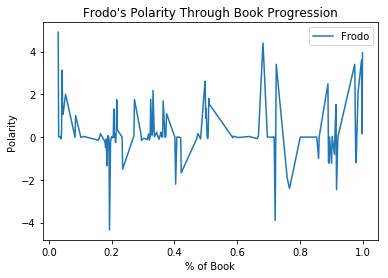

In [36]:
from scipy.interpolate import UnivariateSpline
from numpy import linspace,exp
x = frodo.index
y = frodo.polarity
s = UnivariateSpline(x, y, s=1)
xs = frodo.index
ys = s(xs)
#plt.plot(x, y, '.-')
plt.title("Frodo's Polarity Through Book Progression")
plt.xlabel('% of Book')
plt.ylabel('Polarity')
plt.plot(xs, ys, label='Frodo')
plt.legend()
plt.show()
#plt.title("Frodo's Polarity Progression")

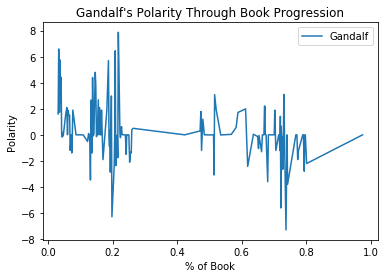

In [45]:
from scipy.interpolate import UnivariateSpline
from numpy import linspace,exp
x = gandalf.index
y = gandalf.polarity
s = UnivariateSpline(x, y, s=1)
xs = gandalf.index
ys = s(xs)
#plt.plot(x, y, '.-')
plt.title("Gandalf's Polarity Through Book Progression")
plt.xlabel('% of Book')
plt.ylabel('Polarity')
plt.plot(xs, ys, label='Gandalf')
plt.legend()
plt.show()
#plt.title("gandalf's Polarity Progression")

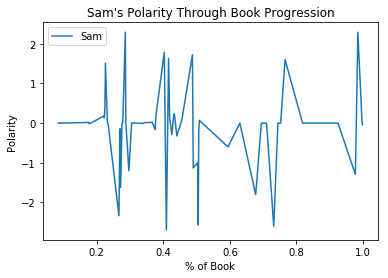

In [47]:
from scipy.interpolate import UnivariateSpline
from numpy import linspace,exp
x = sam.index
y = sam.polarity
s = UnivariateSpline(x, y, s=1)
xs = sam.index
ys = s(xs)
#plt.plot(x, y, '.-')
plt.title("Sam's Polarity Through Book Progression")
plt.xlabel('% of Book')
plt.ylabel('Polarity')
plt.plot(xs, ys, label='Sam')
plt.legend()
plt.show()
#plt.title("sam's Polarity Progression")

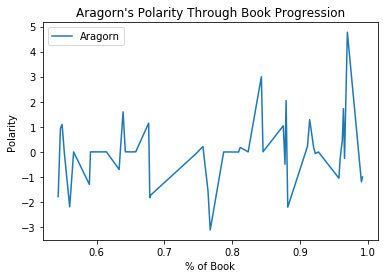

In [48]:
from scipy.interpolate import UnivariateSpline
from numpy import linspace,exp
x = aragorn.index
y = aragorn.polarity
s = UnivariateSpline(x, y, s=1)
xs = aragorn.index
ys = s(xs)
#plt.plot(x, y, '.-')
plt.title("Aragorn's Polarity Through Book Progression")
plt.xlabel('% of Book')
plt.ylabel('Polarity')
plt.plot(xs, ys, label='Aragorn')
plt.legend()
plt.show()